Problem Statement : There is a patient dataset and we need to predict weather the patient has a diabetes or not ?

## Importing Libraries

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder , StandardScaler , PolynomialFeatures
from sklearn.metrics import confusion_matrix, classification_report , roc_auc_score , roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle

## EDA 

In [2]:
df = pd.read_csv("Desktop/Logistic-regression_final/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


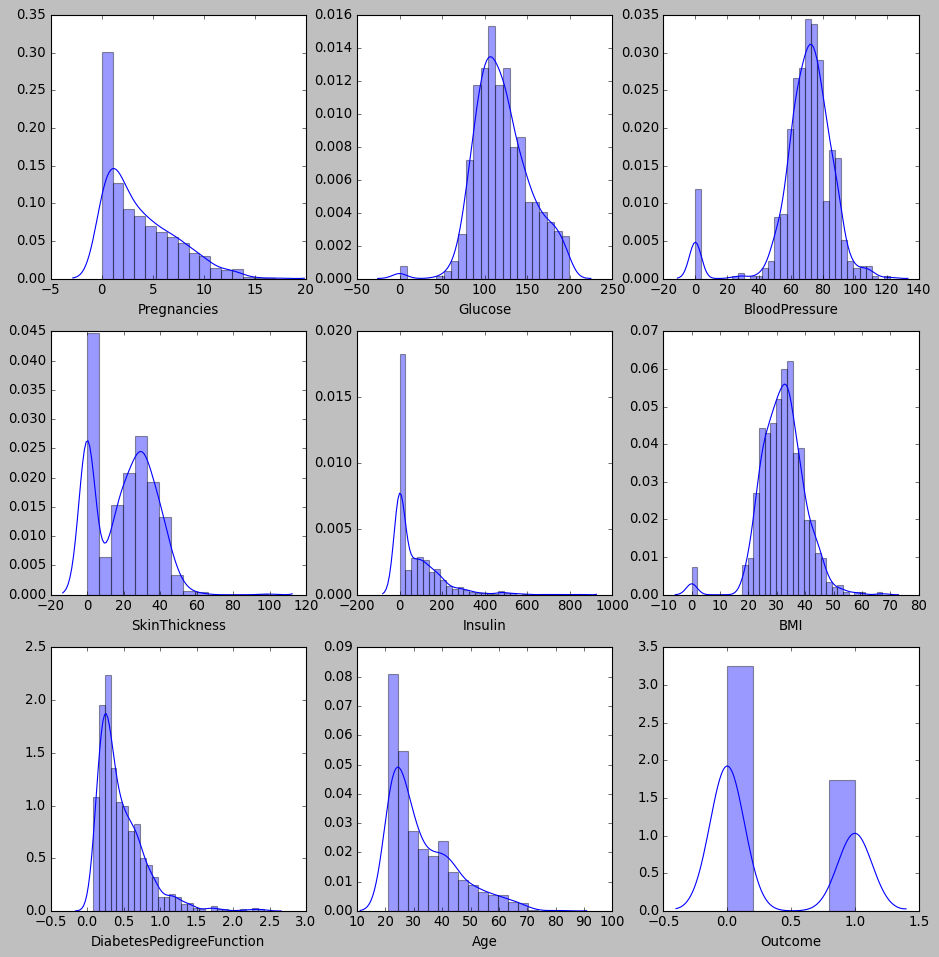

In [11]:
plt.style.use("classic")
fig = plt.figure(figsize=(14,14))
for i in range(len(df.columns)):
    plt.subplot(3,3,i+1)
    sns.distplot(df.iloc[:,i])
    plt.xlabel(df.columns[i])

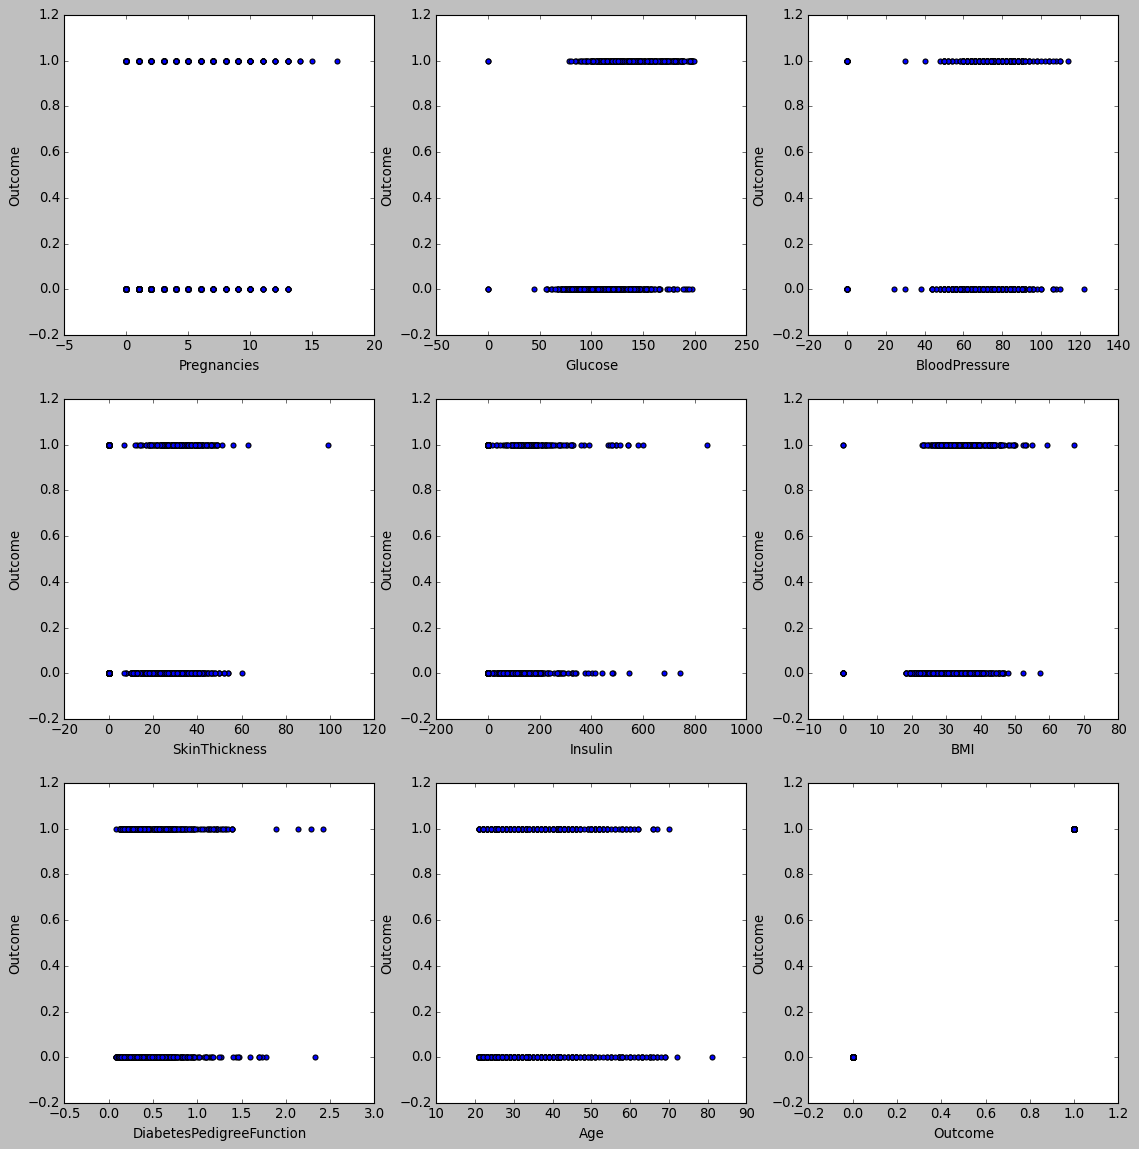

In [27]:
plt.style.use("classic")
fig = plt.figure(figsize=(17,17))
for i in range(len(df.columns)):
    plt.subplot(3,3,i+1)
    plt.scatter(df.iloc[:,i], df["Outcome"])
    plt.xlabel(df.columns[i])
    plt.ylabel("Outcome")

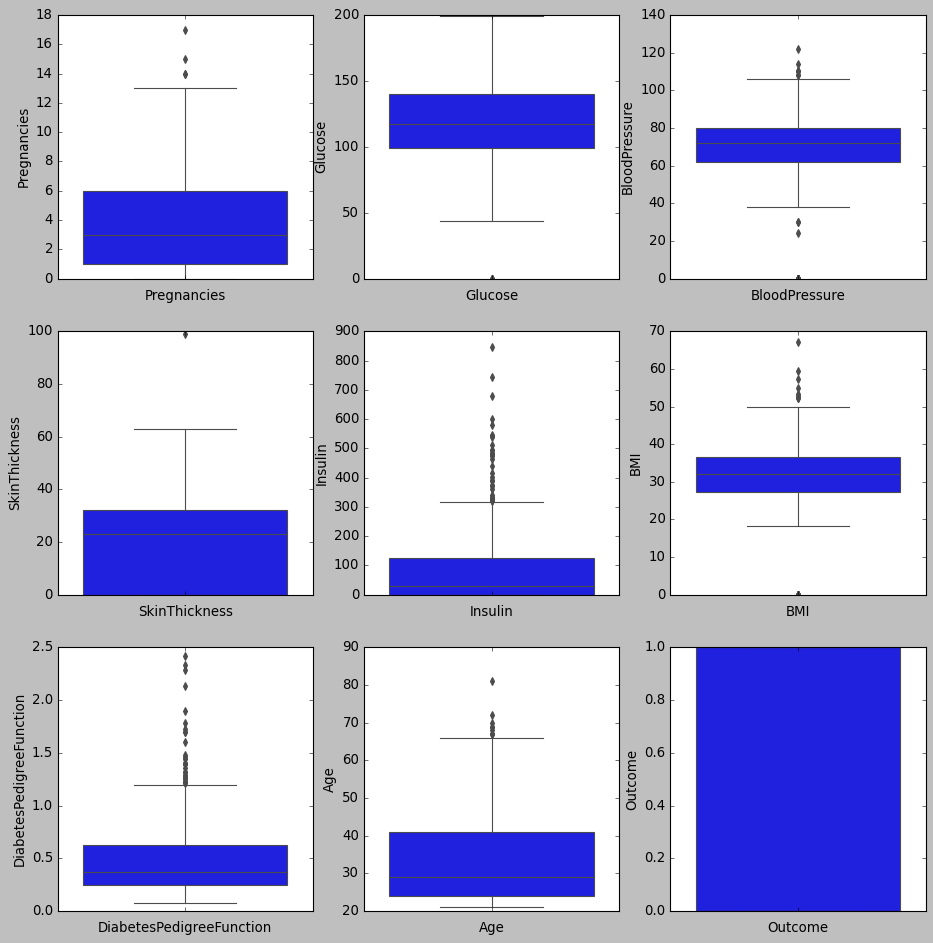

In [31]:
plt.style.use("classic")
fig = plt.figure(figsize=(14,14))
for i in range(len(df.columns)):
    plt.subplot(3,3,i+1)
    sns.boxplot(y = df.iloc[:,i])
    plt.xlabel(df.columns[i])

In [32]:
X = df.drop(["Outcome"], axis = 1)
y = df[["Outcome"]]

In [35]:
sc = StandardScaler()
x_scaled = sc.fit_transform(X)

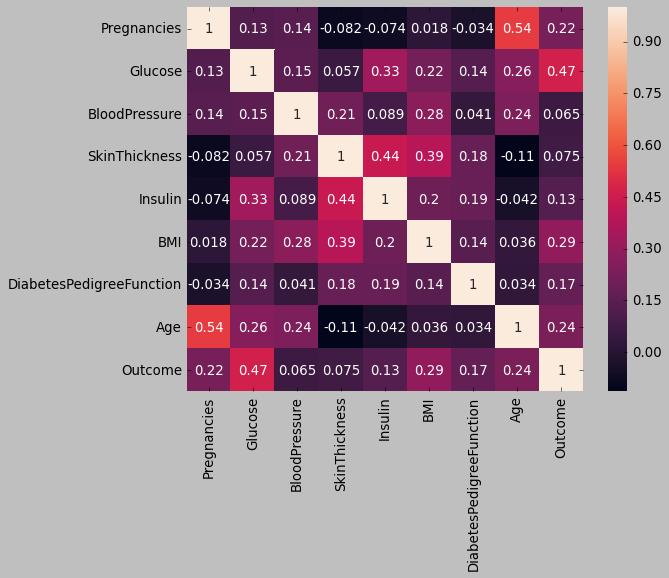

In [41]:
sns.heatmap(df.corr(), annot= True)

In [36]:
vif = []
for i in range(len(X.columns)):
    vif.append(variance_inflation_factor(x_scaled, i))

In [39]:
VIF = pd.DataFrame({"Feature":X.columns, "VIF":vif})
VIF

,Feature,VIF
0,Pregnancies,1.430872
1,Glucose,1.298961
2,BloodPressure,1.181863
3,SkinThickness,1.507432
4,Insulin,1.427536
5,BMI,1.297450
6,DiabetesPedigreeFunction,1.067090
7,Age,1.588368


In [42]:
X = pd.DataFrame(x_scaled,columns=X.columns)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [51]:
zero = 0
one = 0
for i in df["Outcome"]:
    if(i == 0):
        zero += 1
    else:
        one += 1


Text(0, 0.5, 'amount of labels in the dataset')

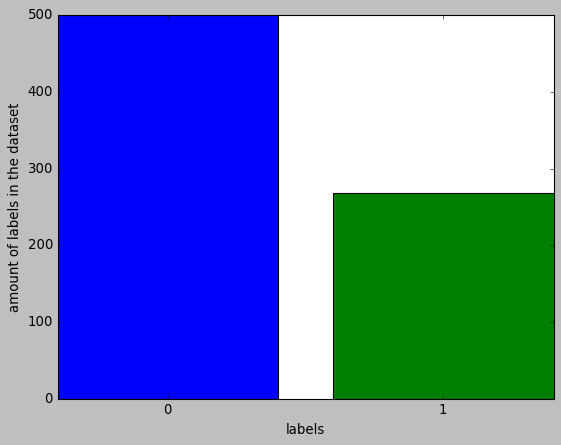

In [69]:
plt.bar(x = 0 , height=zero)
plt.bar(x = 1 , height=one)
plt.xticks([0, 1])
plt.xlabel("labels")
plt.ylabel("amount of labels in the dataset")

In [73]:
df = df.append(df[df["Outcome"] == 1])

In [74]:
len(df)

1036

Text(0, 0.5, 'amount of labels in the dataset')

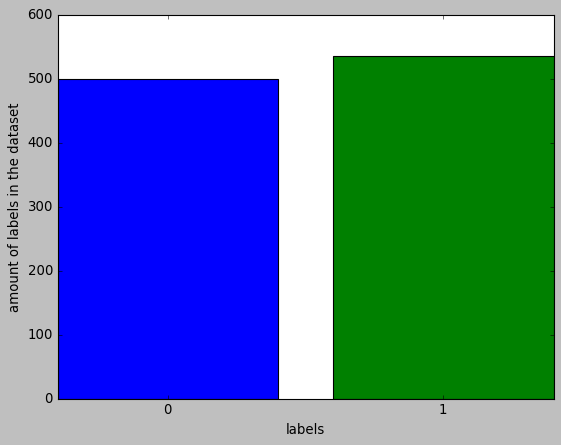

In [75]:
zero = 0
one = 0
for i in df["Outcome"]:
    if(i == 0):
        zero += 1
    else:
        one += 1
plt.bar(x = 0 , height=zero)
plt.bar(x = 1 , height=one)
plt.xticks([0, 1])
plt.xlabel("labels")
plt.ylabel("amount of labels in the dataset")

In [84]:
X = df.drop(["Outcome"], axis = 1)
y = df[["Outcome"]]
X = pd.DataFrame(sc.transform(X), columns=X.columns)

In [85]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [96]:
x_train, x_test, y_train, y_test = train_test_split(X,y ,random_state = 101 , test_size = 0.25)

In [97]:
print("Independent training features = ", np.shape(x_train))
print("Dependent training features = ", np.shape(y_train))
print("Independent training features = ", np.shape(x_test))
print("Dependent training features = ", np.shape(y_test))

Independent training features =  (777, 8)
Dependent training features =  (777, 1)
Independent training features =  (259, 8)
Dependent training features =  (259, 1)


## Model Selection

In [98]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7297297297297297

In [99]:
lr = SVC()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7644787644787645

In [100]:
lr = DecisionTreeClassifier(criterion='gini')
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.8494208494208494

In [102]:
lr = RandomForestClassifier()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

<ipython-input-102-d0f5ad2d64fc>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  lr.fit(x_train, y_train)


0.8416988416988417

In [103]:
lr = GradientBoostingClassifier()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7683397683397684

In [ ]:
lr = GradientBoostingClassifier()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

## Fining and Tuning

In [110]:
deg = [1,2,3,4]
for i in deg:
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(X)
    x_train, x_test , y_train, y_test = train_test_split(x_poly, y, random_state = 101 , test_size = 0.25)
    lr = DecisionTreeClassifier()
    lr.fit(x_train, y_train)
    print(lr.score(x_test , y_test))

0.8262548262548263
0.8648648648648649
0.806949806949807
0.833976833976834


In [116]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X)
x_train, x_test , y_train, y_test = train_test_split(x_poly, y, random_state = 101 , test_size = 0.25)
lr = DecisionTreeClassifier()
lr.fit(x_train, y_train)
print(lr.score(x_test , y_test))

0.8687258687258688


## Testing results visualizations

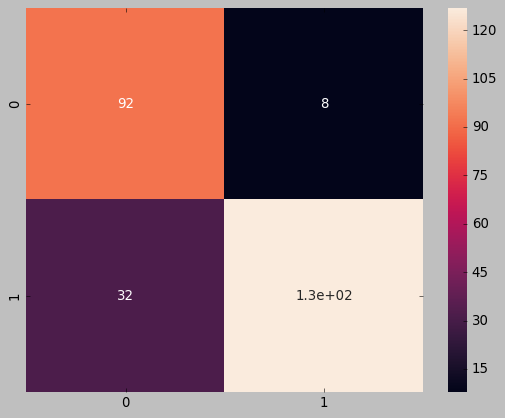

In [121]:
cm = confusion_matrix(lr.predict(x_test), y_test)
sns.heatmap(cm,annot=True)

In [122]:
print(classification_report(lr.predict(x_test), y_test))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82       100
           1       0.94      0.80      0.86       159

    accuracy                           0.85       259
   macro avg       0.84      0.86      0.84       259
weighted avg       0.86      0.85      0.85       259



In [123]:
roc_auc_score(lr.predict(x_test), y_test)

0.85937106918239

In [124]:
fpr, tpr, threshold = roc_curve(lr.predict(x_test), y_test)

Text(0, 0.5, 'True Positive Rate')

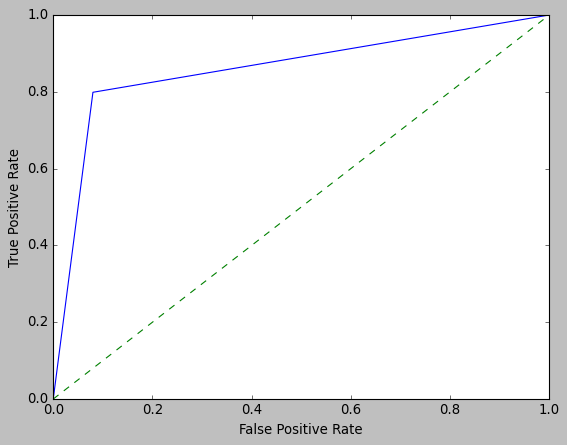

In [125]:
plt.plot(fpr, tpr)
plt.plot([0,1], linestyle = "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

## Saving model for deployment

In [117]:
pickle.dump(lr, open("Desktop/Diabetes Detection/model.pickle", "wb"))
pickle.dump(sc, open("Desktop/Diabetes Detection/scaler.pickle", "wb"))
pickle.dump(poly, open("Desktop/Diabetes Detection/poly.pickle", "wb"))